In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the dataset and clean the data.

In [24]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("adilshamim8/predict-calorie-expenditure")

print("Path to dfset files:", path)

# Read train.csv
df = pd.read_csv(os.path.join(path, "train.csv"))
print(df.head())

Path to dfset files: C:\Users\HP\.cache\kagglehub\datasets\adilshamim8\predict-calorie-expenditure\versions\1
   id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0


In [25]:
#drop 'id' column
df = df.drop(columns=['id'])

df.info()

#encode 'sex' column
from sklearn.preprocessing import LabelEncoder

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.8+ MB


In [26]:
#check for missing values
df.isnull().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

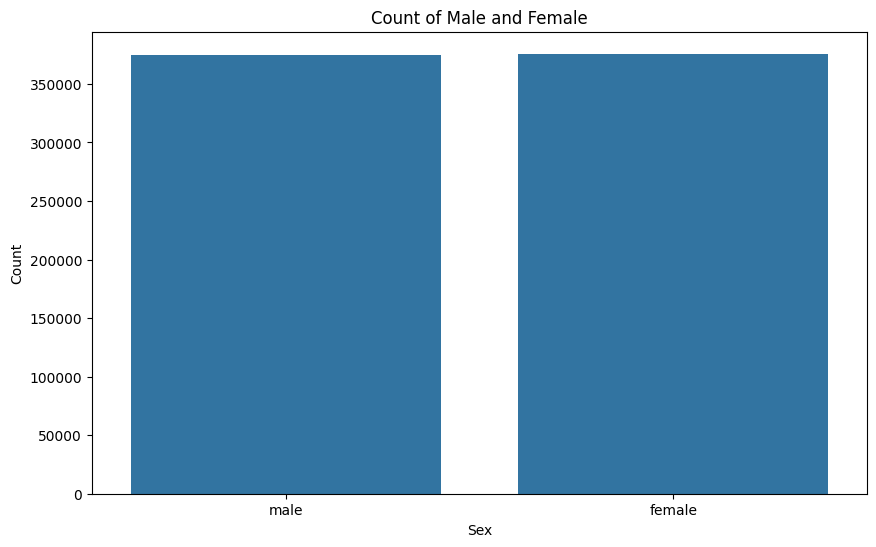

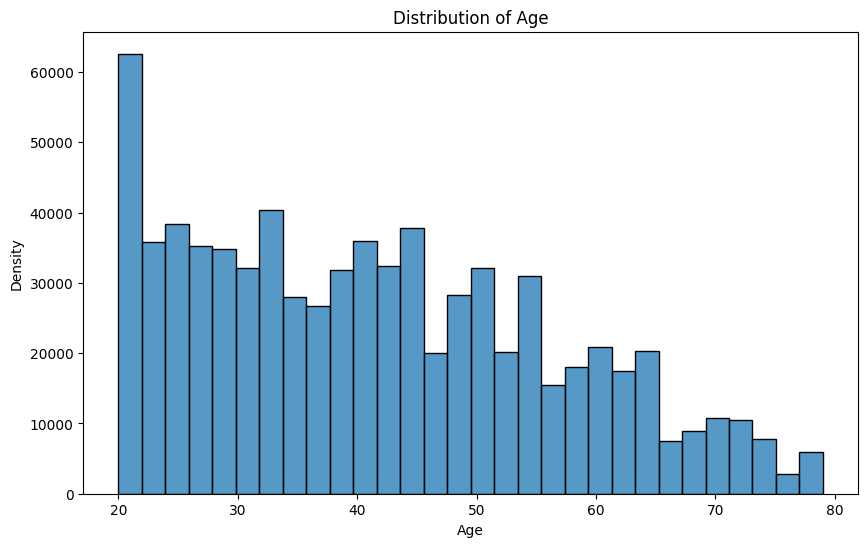

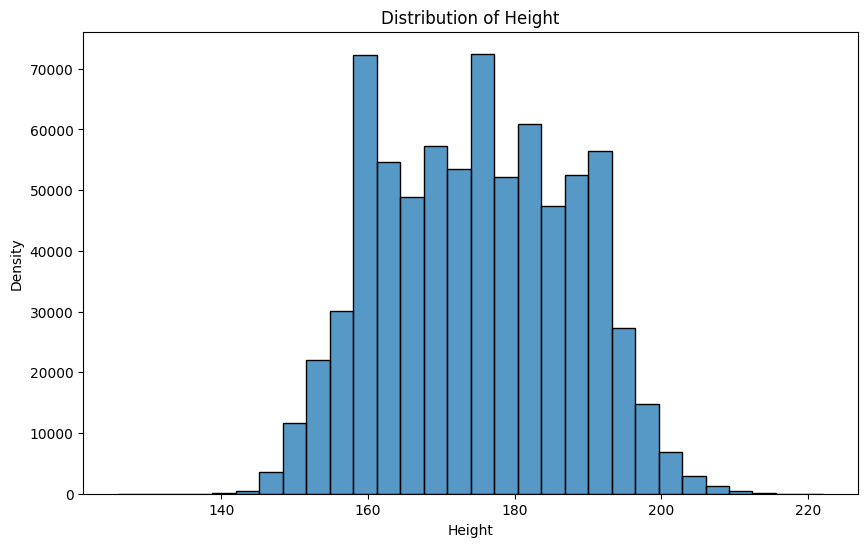

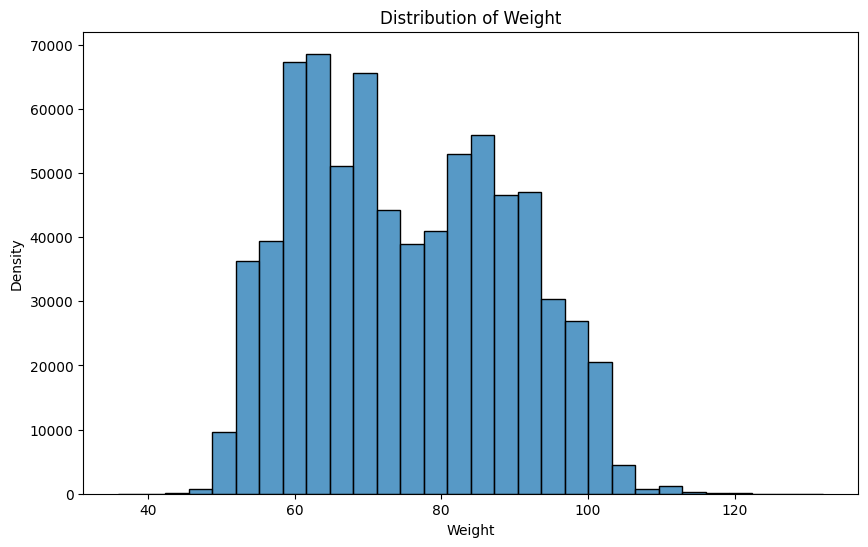

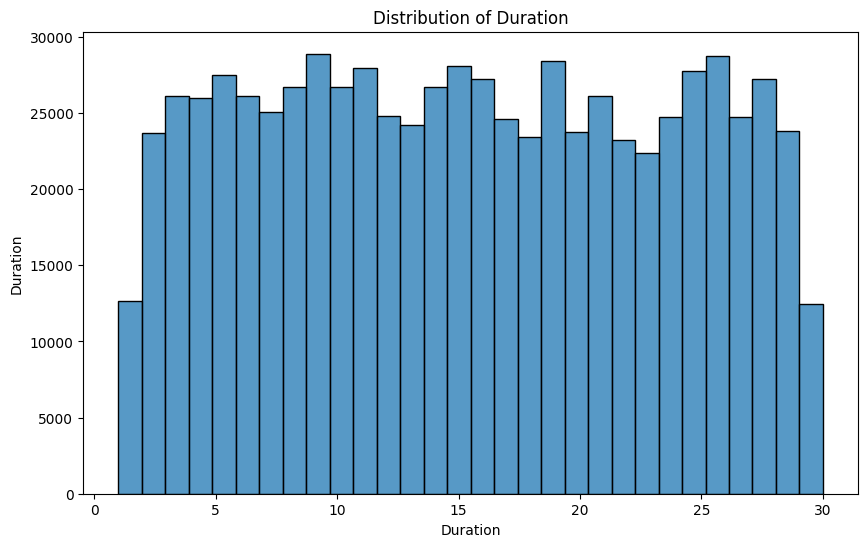

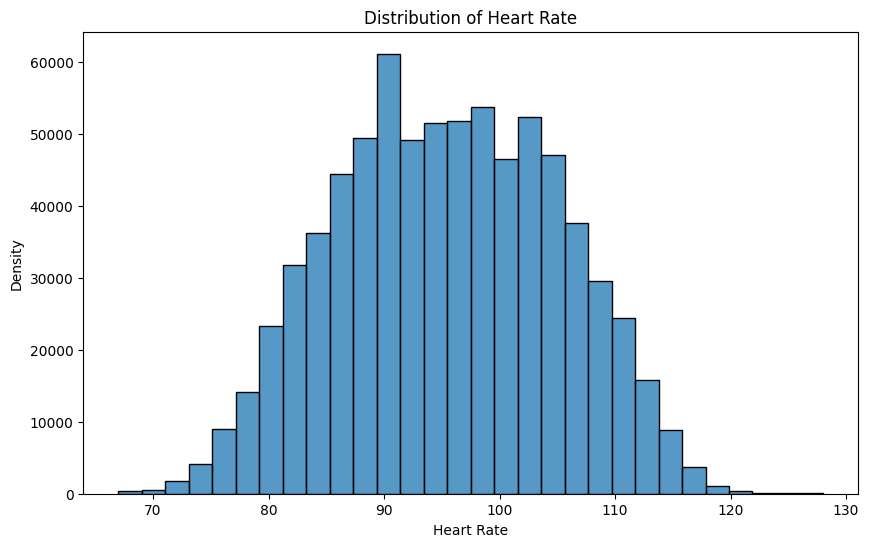

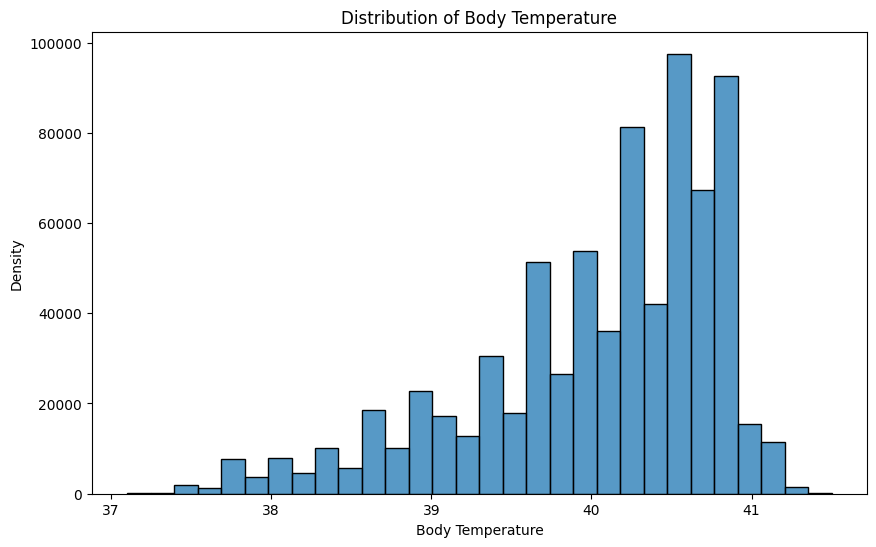

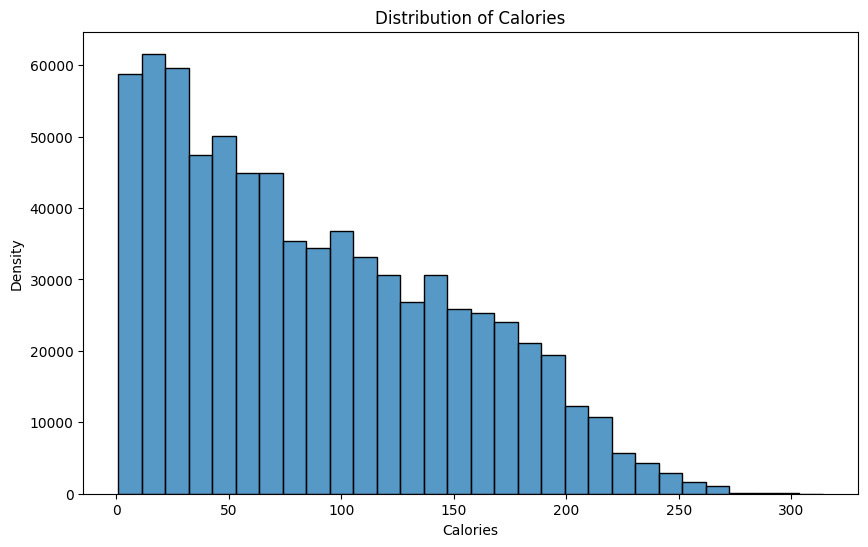

In [19]:
#visualize variables distribution
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x = 'Sex')
plt.title('Count of Male and Female')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'Age', bins = 30, kde = False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'Height', bins = 30, kde = False)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'Weight', bins = 30, kde = False)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'Duration', bins = 30, kde = False)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Duration')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'Heart_Rate', bins = 30, kde = False)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'Body_Temp', bins = 30, kde = False)
plt.title('Distribution of Body Temperature')
plt.xlabel('Body Temperature')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'Calories', bins = 30, kde = False)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Density')
plt.show()

Preparing data for modelling

In [27]:
#Independent and target variable
X = df.drop(columns = ['Calories'])
y = df['Calories']

#Split in train, test, and validation (used only in XGBoost) datasets
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)


Linear regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#initialize the model
model = LinearRegression()

#train the model
model.fit(X_train, y_train)

#predict 'calories'
y_pred = model.predict(X_test)

#evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE = {rmse:.3f}')
print(f'R^2 = {r2:.3f}')


RMSE = 11.103
R^2 = 0.968


XGBoost (scikit-learn API) 

In [37]:
import xgboost as xgb

#initialize the model
model_xgb_1 = xgb.XGBRegressor()

#train the model
model_xgb_1.fit(X_train, y_train)

#predict 'calories'
y_pred_xgb_1 = model_xgb_1.predict(X_test)

#evaluate the model
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred_xgb_1))
r2_1 = r2_score(y_test, y_pred_xgb_1)

print(f'RMSE = {rmse_1:.3f}')
print(f'R^2 = {r2_1:.3f}')

RMSE = 3.792
R^2 = 0.996


XGBoost (native API)

[0]	train-rmse:44.24492	eval-rmse:44.11690
[50]	train-rmse:3.74754	eval-rmse:3.97379
[100]	train-rmse:3.54973	eval-rmse:3.84840
[150]	train-rmse:3.43632	eval-rmse:3.80563
[200]	train-rmse:3.36135	eval-rmse:3.78524
[250]	train-rmse:3.30408	eval-rmse:3.77377
[278]	train-rmse:3.27920	eval-rmse:3.77358
Best iteration (round): 229.000
Best score: 3.772


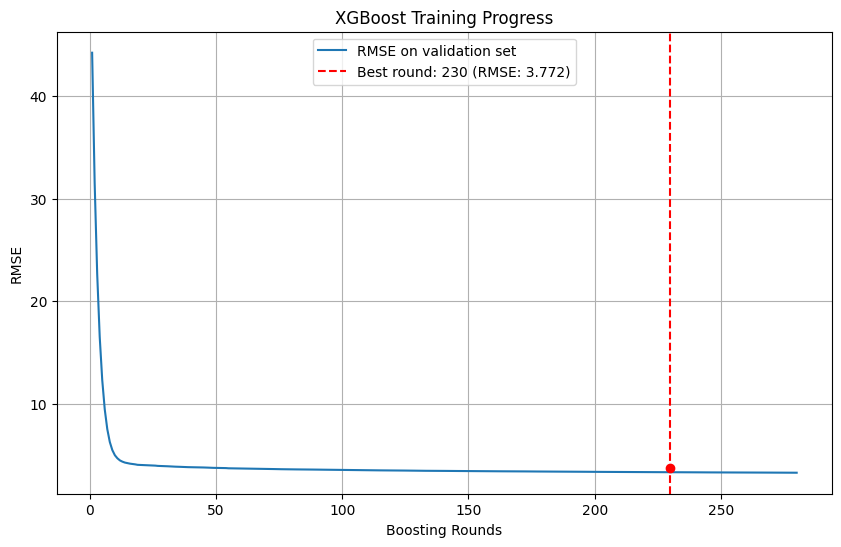

In [40]:
#creating DMatrices
dtrain = xgb.DMatrix(X_train, label = y_train)
dval = xgb.DMatrix(X_val, label = y_val)
dtest = xgb.DMatrix(X_test, label = y_test)

#setting the parameters
params = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'eval_metric': 'rmse',
}

#setting number of boosting rounds
n = 1000

#evaluation instructions
evals = [(dtrain, 'train'), (dval, 'eval')]

#result dictionary
evals_result = {}

#initialize the model
model_xgb_2 = xgb.train(
    params = params,
    dtrain = dtrain,
    evals = evals,
    num_boost_round = n,
    early_stopping_rounds = 50,
    verbose_eval = 50,
    evals_result = evals_result
)

#print best interaction round and its score
print(f'Best iteration (round): {model_xgb_2.best_iteration:.3f}')
print(f"Best score: {model_xgb_2.best_score:.3f}")

#visualize model training
metric = 'rmse'
eval_name = list(evals_result.keys())[0] # get the name of the first evaluation set

results = evals_result[eval_name][metric] # get the results for the specified metric

plt.figure(figsize=(10, 6))

rounds = range(1, len(results) + 1)  # boosting rounds, starting at 1
plt.plot(rounds, results, label='RMSE on validation set', marker='o', markersize=0)

best_round = model_xgb_2.best_iteration + 1  # +1 because best_iteration is 0-based
best_score = model_xgb_2.best_score

plt.axvline(best_round, color='red', linestyle='--', label=f'Best round: {best_round} (RMSE: {best_score:.3f})')
plt.scatter(best_round, best_score, color='red', zorder=5)

plt.title('XGBoost Training Progress')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
#predict 'calories'
y_pred_xgb_2 = model_xgb_2.predict(dtest)

#evaluate the model
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_xgb_2))
r2_2 = r2_score(y_test, y_pred_xgb_2)

print(f'RMSE = {rmse_2:.3f}')
print(f'R^2: {r2_2:.3f}')

RMSE = 3.695
R^2: 0.996


XGBoost (native API) with hyperparameter tuninG (HYPEROPT)

In [44]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from xgboost import XGBRegressor

#define the set of parameter to tune
space = {
    'max_depth': hp.quniform('max_depth', 3, 18, 1),
    'gamma': hp.uniform('gamma', 1, 9),
    'reg_alpha': hp.quniform('reg_alpha', 0, 180, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 0, 10, 1), # usually >0
    'n_estimators': 180,
}

#define the function to tune parameters
#multiple XGBoost models (scikit-learn API) are trained and the best parameters are choosen on a Bayesan-probabilistic base
def objective(space):

    #initialize the model (parameters are taken from the intervals defined in 'space')
    model_tune = XGBRegressor(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        gamma=space['gamma'],
        reg_alpha=int(space['reg_alpha']),
        min_child_weight=int(space['min_child_weight']),
        colsample_bytree=float(space['colsample_bytree']),
        random_state=0
    )

    #train the model 
    model_tune.fit(X_train, y_train)

    #make predictions
    pred = model_tune.predict(X_val)

    # Evaluate with RMSE (or other regression metric)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    print("RMSE:", rmse)
    return {'loss': rmse, 'status': STATUS_OK}

trials = Trials()

#display the progress of the tuning
best_hyperparams = fmin(fn=objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials
                        )

#print the best parameters
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

RMSE:                                                  
3.7333474772758617                                     
RMSE:                                                                            
3.8415365183148507                                                               
RMSE:                                                                            
3.7368229628100096                                                               
RMSE:                                                                            
3.7077464187390925                                                               
RMSE:                                                                            
3.7196108410444566                                                               
RMSE:                                                                            
3.738025223281433                                                                
RMSE:                                                               

[0]	train-rmse:46.65951	eval-rmse:46.53265
[50]	train-rmse:3.51649	eval-rmse:3.69473
[100]	train-rmse:3.44125	eval-rmse:3.66131
[150]	train-rmse:3.43503	eval-rmse:3.65952
[158]	train-rmse:3.43503	eval-rmse:3.65952
Best iteration (round): 108.000
Best score: 3.659


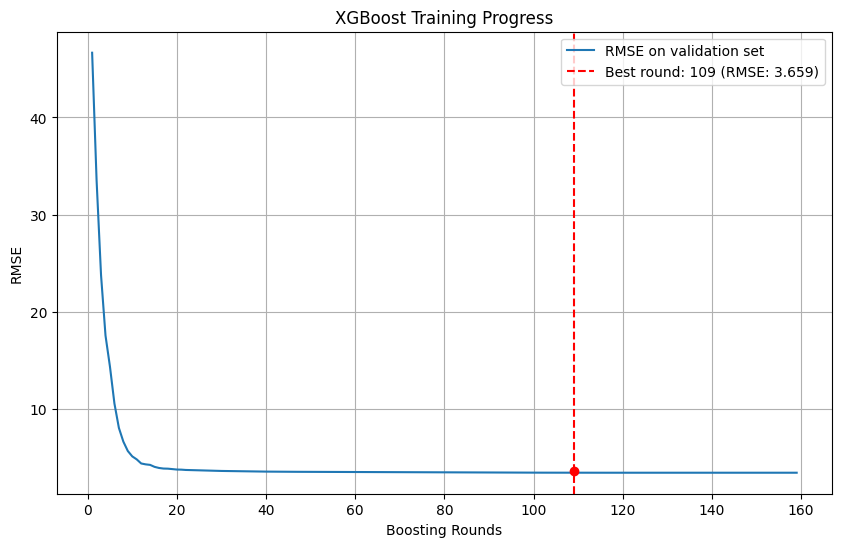

In [ ]:
#setting the parameters
params = {
    'objective': 'reg:squarederror',
    'tree_method': 'hist',
    'eval_metric': 'rmse',
    'colsample_bytree': 0.5901190504625692,
    'gamma': 4.491761440730404,
    'max_depth': 8,
    'min_child_weight': 3,
    'reg_alpha': 152,
    'reg_lambda': 0.7976325817556145
}

#setting number of boosting rounds
n = 1000

#evaluation instructions
evals = [(dtrain, 'train'), (dval, 'eval')]

#result dictionary
evals_result_1 = {}

#initialize the model
model_xgb_3 = xgb.train(
    params = params,
    dtrain = dtrain,
    evals = evals,
    num_boost_round = n,
    early_stopping_rounds = 50,
    verbose_eval = 50,
    evals_result = evals_result_1
)

#print best interaction round and its score
print(f'Best iteration (round): {model_xgb_3.best_iteration:.3f}')
print(f"Best score: {model_xgb_3.best_score:.3f}")

#visualize model training
metric = 'rmse'
eval_name = list(evals_result_1.keys())[0] # get the name of the first evaluation set

results = evals_result_1[eval_name][metric] # get the results for the specified metric

plt.figure(figsize=(10, 6))

rounds = range(1, len(results) + 1)  # boosting rounds, starting at 1
plt.plot(rounds, results, label='RMSE on validation set', marker='o', markersize=0)

best_round = model_xgb_3.best_iteration + 1  # +1 because best_iteration is 0-based
best_score = model_xgb_3.best_score

plt.axvline(best_round, color='red', linestyle='--', label=f'Best round: {best_round} (RMSE: {best_score:.3f})')
plt.scatter(best_round, best_score, color='red', zorder=5)

plt.title('XGBoost Training Progress')
plt.xlabel('Boosting Rounds')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
#predict 'calories'
y_pred_xgb_3 = model_xgb_3.predict(dtest)

#evaluate the model
rmse_3 = np.sqrt(mean_squared_error(y_test, y_pred_xgb_3))
r2_3 = r2_score(y_test, y_pred_xgb_3)

print(f'RMSE: {rmse_3:.3f}')
print(f'R^2: {r2_3:.3f}')

RMSE: 3.614
R^2: 0.997


Comparing model performance

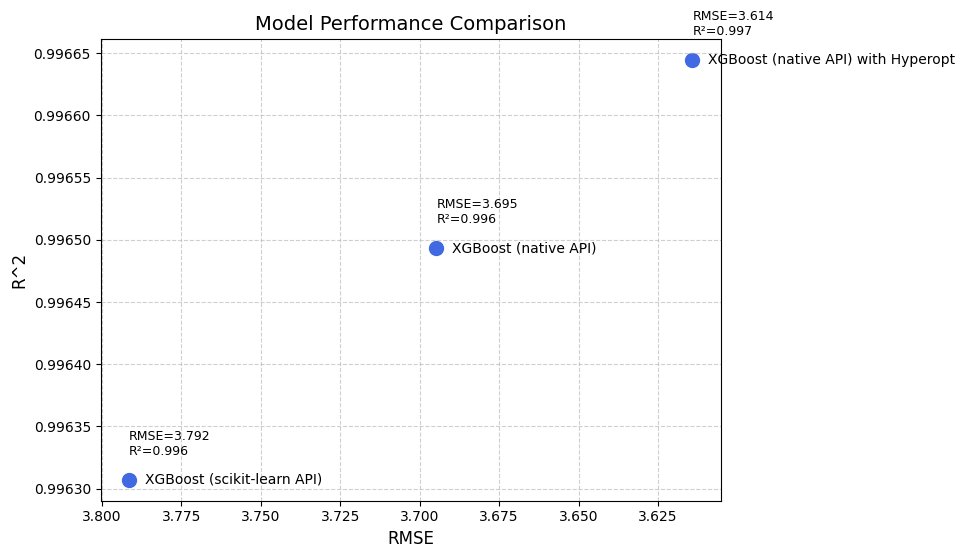

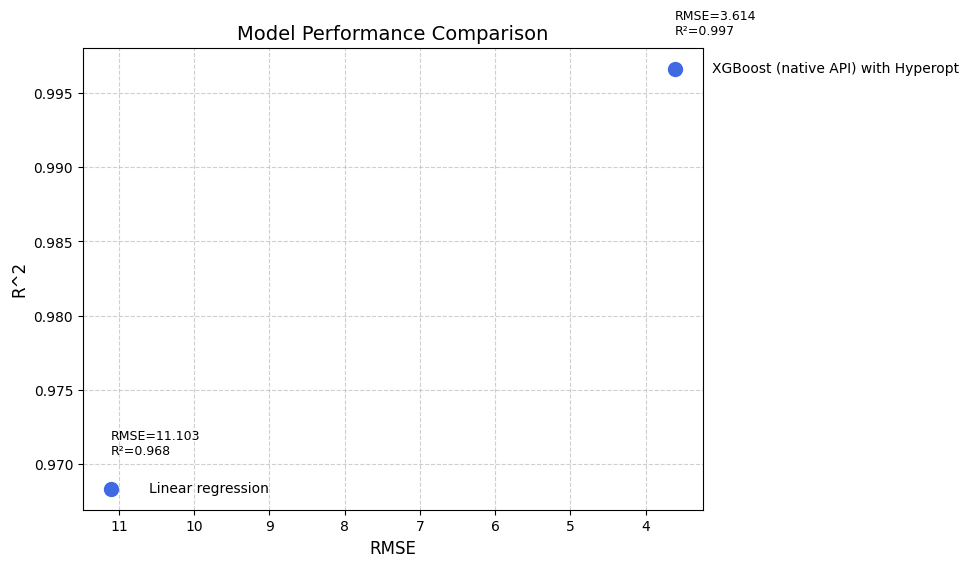

In [72]:
#results
results = {
    "XGBoost (scikit-learn API)": {'rmse': rmse_1, 'r2': r2_1},
    "XGBoost (native API)": {'rmse': rmse_2, 'r2': r2_2},
    "XGBoost (native API) with Hyperopt": {'rmse': rmse_3, 'r2': r2_3}
}

#extract values
models = list(results.keys())
rmses = [results[m]["rmse"] for m in models]
r2s = [results[m]["r2"] for m in models]

#plot
plt.figure(figsize=(8,6))
plt.scatter(rmses, r2s, color="royalblue", s=100)

# annotate each point with the model name
for i, model in enumerate(models):
    plt.text(rmses[i]-0.005, r2s[i], model, fontsize=10, va="center")
    plt.text(rmses[i], r2s[i]+0.00004, f'RMSE={rmses[i]:.3f}\nR²={r2s[i]:.3f}', 
             fontsize=9, va="top") 

plt.xlabel("RMSE", fontsize=12)
plt.ylabel("R^2", fontsize=12)
plt.title("Model Performance Comparison", fontsize=14)

#invert x-axis
plt.gca().invert_xaxis()

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

#results - xgb vs linear regression
results = {
    "Linear regression": {'rmse': rmse, 'r2': r2},
    "XGBoost (native API) with Hyperopt": {'rmse': rmse_3, 'r2': r2_3}
}

#extract values
models = list(results.keys())
rmses = [results[m]["rmse"] for m in models]
r2s = [results[m]["r2"] for m in models]

#plot
plt.figure(figsize=(8,6))
plt.scatter(rmses, r2s, color="royalblue", s=100)

# annotate each point with the model name
for i, model in enumerate(models):
    plt.text(rmses[i]-0.5, r2s[i], model, fontsize=10, va="center")
    plt.text(rmses[i], r2s[i]+0.004, f'RMSE={rmses[i]:.3f}\nR²={r2s[i]:.3f}', 
             fontsize=9, va="top") 

plt.xlabel("RMSE", fontsize=12)
plt.ylabel("R^2", fontsize=12)
plt.title("Model Performance Comparison", fontsize=14)

#invert x-axis
plt.gca().invert_xaxis()

plt.grid(True, linestyle="--", alpha=0.6)
plt.show()